###Load processed dataset and normalization

In [69]:
#from google.colab import drive
#drive.mount('/content/drive')

In [70]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 8A9B-6155

 Directory of C:\Users\spore\Documents\GitHub

03/22/2021  12:35 PM    <DIR>          .
03/22/2021  12:35 PM    <DIR>          ..
03/22/2021  12:35 PM    <DIR>          .ipynb_checkpoints
11/06/2020  12:06 PM           139,880 4.jpg
01/26/2021  10:35 PM    <DIR>          Billiard-ball-path-detection
03/22/2021  12:35 PM        11,665,557 ClassificationHeartDesease_KNN.ipynb
03/22/2021  09:46 AM        28,289,640 csgo_data_processed_unnorm.csv
03/17/2021  12:23 AM    <DIR>          image-tagging
03/07/2021  03:06 PM    <DIR>          MLHW
11/22/2020  07:21 PM    <DIR>          Python-CloudKarafka-example
03/10/2021  09:40 AM    <DIR>          QuickGallery
02/28/2021  09:42 PM    <DIR>          QVulkanApp
02/25/2021  08:03 PM    <DIR>          Stonks
02/03/2021  11:17 PM        62,089,376 Stonks.zip
02/18/2021  06:45 PM    <DIR>          VulkanMultithreading
               4 File(s)    102,184,453 bytes
              11

In [71]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import sklearn
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, accuracy_score
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import DBSCAN

# Comment this line if you use light color scheme
plt.style.use('dark_background')
matplotlib.rcParams['figure.figsize'] = (16, 9)
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [72]:
#data_ready = pd.read_csv('drive/MyDrive/csgo_data_processed_unnorm.csv')

In [73]:
data_ready = pd.read_csv('csgo_data_processed_unnorm.csv')

In [74]:
data_ready.shape

(122410, 58)

In [75]:
data_ready = data_ready.drop(data_ready.columns[0], axis=1)
data_ready.head()

,de_cache,de_dust2,de_inferno,de_mirage,de_nuke,de_overpass,de_train,de_vertigo,time_left,ct_score,...,t_weapon_p250,ct_weapon_p2000,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_molotovgrenade
0,0,1,0,0,0,0,0,0,175.00,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,0,0,0,0,0,0,156.03,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
2,0,1,0,0,0,0,0,0,96.03,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
3,0,1,0,0,0,0,0,0,76.03,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,0,0,0,0,0,0,174.97,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
data_ready['de_cache'].sum()

145

In [77]:
data = data_ready.sample(32000)
data.shape

(32000, 57)

In [78]:
Y = data['round_winner']
data = data.drop(['round_winner'], axis=1)

In [79]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)
data_stand.describe()

,de_cache,de_dust2,de_inferno,de_mirage,de_nuke,de_overpass,de_train,de_vertigo,time_left,ct_score,...,t_weapon_p250,ct_weapon_p2000,ct_grenade_hegrenade,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_molotovgrenade
count,3.200000e+04,3.200000e+04,3.200000e+04,3.200000e+04,3.200000e+04,3.200000e+04,3.200000e+04,3.200000e+04,3.200000e+04,3.200000e+04,...,3.200000e+04,3.200000e+04,3.200000e+04,3.200000e+04,3.200000e+04,3.200000e+04,3.200000e+04,3.200000e+04,3.200000e+04,3.200000e+04
mean,1.332268e-18,1.776357e-17,-2.797762e-17,-5.706546e-17,2.131628e-17,-5.995204e-17,-9.947598e-17,1.598721e-17,-3.148592e-16,5.995204e-17,...,-1.310063e-17,-5.950795e-17,2.664535e-18,2.331468e-17,-1.028067e-16,5.351275e-17,6.528111e-17,5.084821e-17,8.215650e-18,-7.860379e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.875831e-02,-4.693073e-01,-4.877536e-01,-4.243417e-01,-4.274651e-01,-3.624053e-01,-3.508262e-01,-3.202665e-01,-1.795417e+00,-1.392550e+00,...,-5.058159e-01,-4.106232e-01,-7.045938e-01,-5.429045e-01,-1.047383e+00,-1.038320e+00,-8.936329e-01,-8.911115e-01,-6.964829e-01,-8.127221e-01
25%,-3.875831e-02,-4.693073e-01,-4.877536e-01,-4.243417e-01,-4.274651e-01,-3.624053e-01,-3.508262e-01,-3.202665e-01,-7.878325e-01,-7.680210e-01,...,-5.058159e-01,-4.106232e-01,-7.045938e-01,-5.429045e-01,-1.047383e+00,-1.038320e+00,-8.936329e-01,-8.911115e-01,-6.964829e-01,-8.127221e-01
50%,-3.875831e-02,-4.693073e-01,-4.877536e-01,-4.243417e-01,-4.274651e-01,-3.624053e-01,-3.508262e-01,-3.202665e-01,-5.357497e-02,-1.434920e-01,...,-5.058159e-01,-4.106232e-01,-7.045938e-01,-5.429045e-01,-4.854539e-01,-4.812160e-01,-3.201480e-01,-3.444802e-01,-6.964829e-01,-2.117630e-01
75%,-3.875831e-02,-4.693073e-01,-4.877536e-01,-4.243417e-01,-4.274651e-01,-3.624053e-01,-3.508262e-01,-3.202665e-01,1.267905e+00,6.892132e-01,...,-5.058159e-01,-4.106232e-01,7.310355e-02,7.002400e-01,6.384039e-01,6.329920e-01,8.268219e-01,7.487824e-01,6.710972e-01,3.891961e-01
max,2.580011e+01,2.130733e+00,2.050151e+00,2.356518e+00,2.339299e+00,2.759255e+00,2.850325e+00,3.122302e+00,1.416409e+00,5.269092e+00,...,8.166552e+00,6.628631e+00,3.183893e+00,5.672818e+00,2.886120e+00,1.747200e+00,2.547277e+00,1.842045e+00,2.722468e+00,2.192073e+00


In [80]:
data = data_stand

###Постановка задачи

Собраны данные из множества онлайн-матчей CS:GO, игры, где сражаются две команды по пять человек: террористы, цель которых установить и подорвать бомбу по истечению 45 секунд, либо уничтожить весь спецназ; спецназ, цель которого уничтожить террористов либо обезвредить установленную бомбу.  
Каждый раунд, с некоторым интервалом времени делался "снимок" игры, а именно - количество здоровья команды, количество брони, наличие оружия, факт устрановки бомбы и текущий счет.

Задача состоит в определении победителя раунда по данным показателям.

### Dataset split


In [13]:
X = data
y = (Y == 'CT').astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(22400, 9600)

### Random Forest

In [42]:
est_counts = [ int(np.round(x)) for x in np.logspace(0.8, 3.7, 12, endpoint=False) ]
est_counts

[6, 11, 19, 33, 58, 102, 178, 310, 541, 944, 1647, 2873]

In [43]:
train_acc = []
test_acc  = []
oob_acc  = []
for cnt in est_counts:
    rf_model = RandomForestClassifier(n_estimators = cnt, oob_score=True)
    rf_model.fit(X_train, y_train)
    train_acc.append(rf_model.score(X_train, y_train))
    test_acc.append(rf_model.score(X_test, y_test))
    oob_acc.append(rf_model.oob_score_)
    print("Train: {:.5f}, Test: {:.5f}, OOB: {:.5f}".format(train_acc[-1], test_acc[-1], oob_acc[-1]))

C:\Users\spore\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\spore\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


Train: 0.97473, Test: 0.76594, OOB: 0.71469


C:\Users\spore\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\spore\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


Train: 0.99147, Test: 0.78875, OOB: 0.74652


C:\Users\spore\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\spore\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


Train: 0.99679, Test: 0.79010, OOB: 0.76482
Train: 0.99799, Test: 0.79812, OOB: 0.77875
Train: 0.99835, Test: 0.80365, OOB: 0.78911
Train: 0.99839, Test: 0.80708, OOB: 0.79308
Train: 0.99839, Test: 0.80844, OOB: 0.79862
Train: 0.99839, Test: 0.81083, OOB: 0.80326
Train: 0.99839, Test: 0.81042, OOB: 0.80674
Train: 0.99839, Test: 0.81188, OOB: 0.80500
Train: 0.99839, Test: 0.81115, OOB: 0.80563
Train: 0.99839, Test: 0.81250, OOB: 0.80536


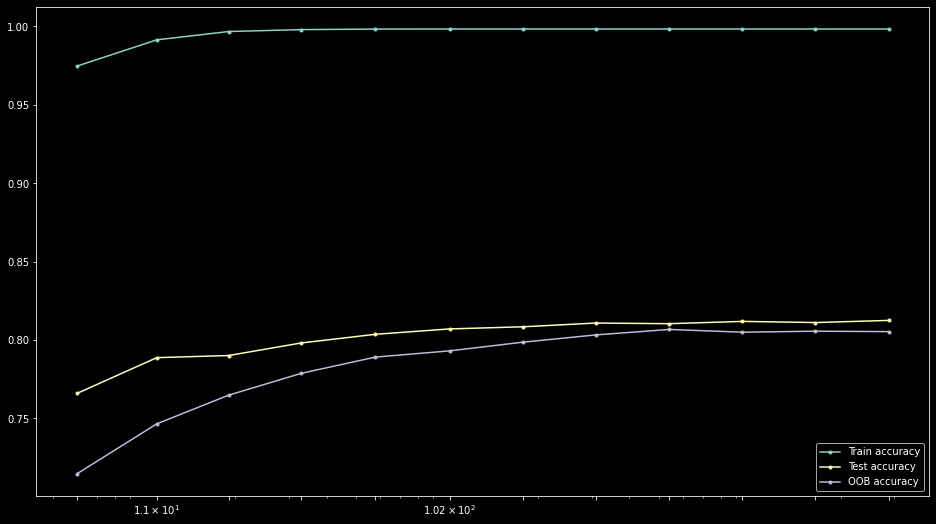

In [45]:
plt.plot(est_counts, train_acc, marker='.', ls = '-',  label='Train accuracy')
plt.plot(est_counts, test_acc,  marker='.', ls = '-',  label='Test accuracy' )
plt.plot(est_counts, oob_acc, marker='.', ls = '-', label='OOB accuracy')
plt.xscale("log")
plt.xticks(est_counts)
plt.legend()

Картина очень похожа на то что было для MLP, очевидно модель переобучена, но точность на тестовой выборке не падает. Так же результат близок к MLP, но хуже.

In [ ]:
forest = RandomForestClassifier(n_estimators = 256)
forest.fit(X_train, y_train)

print("Train: {:.5f}, Test: {:.5f}".format(
    forest.score(X_train, y_train),
    forest.score(X_test, y_test)
))

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("{}. feature {} {:.5f}".format(f + 1, X_test.columns[indices[f]], importances[indices[f]]))

Train: 0.99732, Test: 0.87474
Feature ranking:
1. feature t_armor 0.08155
2. feature ct_armor 0.07759
3. feature ct_money 0.05685
4. feature t_money 0.05595
5. feature t_helmets 0.04583
6. feature time_left 0.04237
7. feature t_health 0.03364
8. feature t_score 0.03349
9. feature ct_score 0.03330
10. feature ct_helmets 0.03295
11. feature ct_defuse_kits 0.03163
12. feature ct_health 0.03157
13. feature ct_grenade_flashbang 0.02504
14. feature t_weapon_ak47 0.02415
15. feature t_grenade_flashbang 0.02100
16. feature t_players_alive 0.02042
17. feature ct_grenade_smokegrenade 0.01962
18. feature ct_weapon_usps 0.01936
19. feature t_weapon_glock 0.01931
20. feature ct_weapon_m4a4 0.01867
21. feature ct_players_alive 0.01732
22. feature t_grenade_smokegrenade 0.01631
23. feature t_weapon_sg553 0.01610
24. feature t_grenade_molotovgrenade 0.01498
25. feature ct_grenade_hegrenade 0.01430
26. feature ct_grenade_incendiarygrenade 0.01365
27. feature ct_weapon_awp 0.01283
28. feature t_grenade_

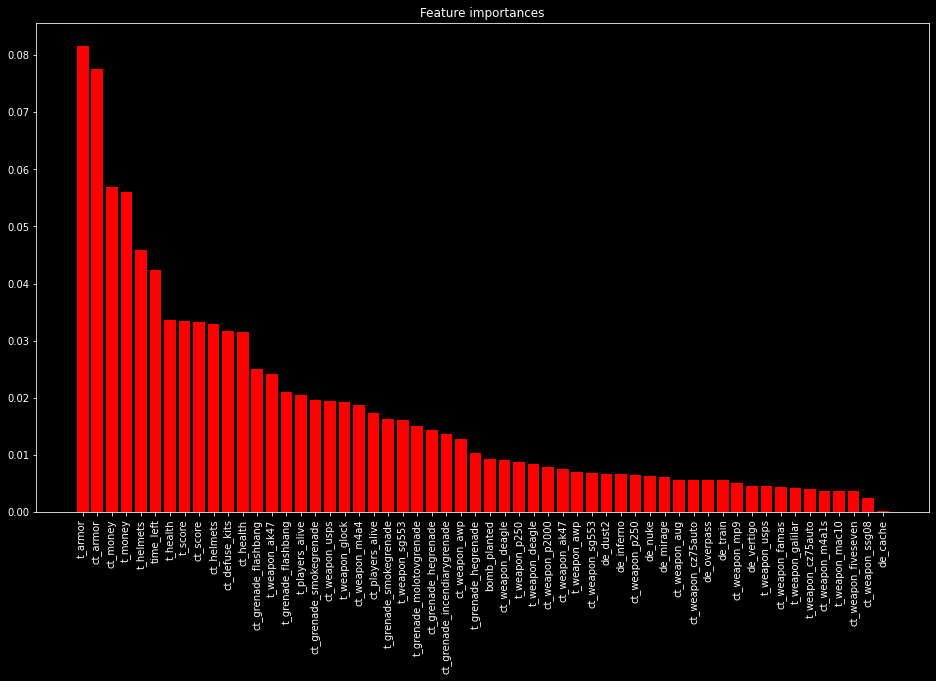

In [ ]:
plt.title("Feature importances")
plt.bar(range(importances.shape[0]), importances[indices], align = 'center', color = 'r')
plt.xticks(range(importances.shape[0]), X_test.columns[indices], rotation = 90)
plt.show()

Значимость признаков весьма ожидаема, похожие выводы можн осделать по статистике и матрице корреляции.

### Gradient Boosting Tree

In [47]:
grad_train_acc = []
grad_test_acc  = []
for cnt in est_counts:
    rf_model = GradientBoostingClassifier(n_estimators = cnt)
    rf_model.fit(X_train, y_train)
    grad_train_acc.append(rf_model.score(X_train, y_train))
    grad_test_acc.append(rf_model.score(X_test, y_test))
    print("Train: {:.5f}, Test: {:.5f}".format(grad_train_acc[-1], grad_test_acc[-1]))

Train: 0.73156, Test: 0.73271
Train: 0.74531, Test: 0.74875
Train: 0.74821, Test: 0.74990
Train: 0.75446, Test: 0.75281
Train: 0.76089, Test: 0.75813
Train: 0.77098, Test: 0.75969
Train: 0.78241, Test: 0.76406
Train: 0.79906, Test: 0.76948
Train: 0.81871, Test: 0.77406
Train: 0.84518, Test: 0.77833
Train: 0.87754, Test: 0.77979
Train: 0.91719, Test: 0.78365


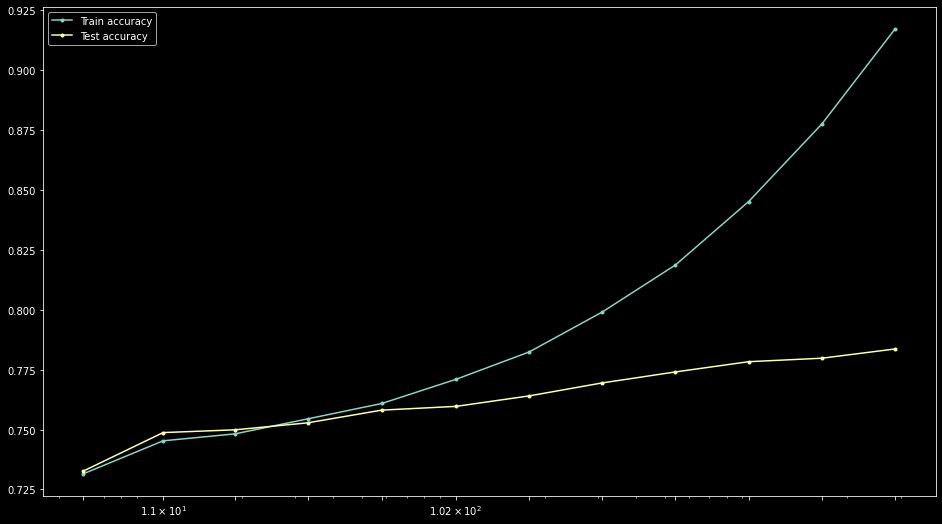

In [48]:
plt.plot(est_counts, grad_train_acc, marker='.', ls = '-',  label='Train accuracy')
plt.plot(est_counts, grad_test_acc,  marker='.', ls = '-',  label='Test accuracy' )
plt.xscale("log")
plt.xticks(est_counts)
plt.legend()

Градиентный бустинг показывает результат хуже, но здесь на первых этапах еще наблюдается недообучение, думаю причина в "дискретности" признаков.

In [ ]:
params = {'n_estimators': 2048, 'subsample': 0.5}
clf = GradientBoostingClassifier(**params)

clf.fit(X_train, y_train)
acc = clf.score(X_test, y_test)
print("Accuracy: {:.4f}".format(acc))

n_estimators = params['n_estimators']
x = np.arange(n_estimators) + 1
def heldout_score(clf, X_test, y_test):
    """compute deviance scores on ``X_test`` and ``y_test``. """
    score = np.zeros((n_estimators,), dtype=np.float64)
    for i, y_pred in enumerate(clf.staged_decision_function(X_test)):
        score[i] = clf.loss_(y_test, y_pred)
    return score

In [34]:
print("Accuracy: {:.4f}".format(acc))

Accuracy: 0.7853


Text(0.5, 0, 'number of iterations')

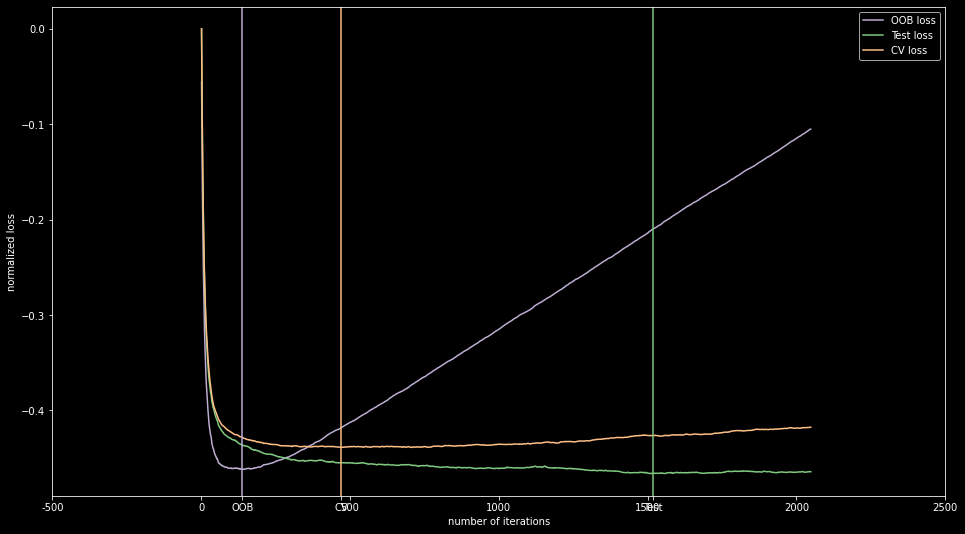

In [32]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from scipy.special import expit

def cv_estimate(n_splits=None):
    cv = KFold(n_splits=n_splits)
    cv_clf = GradientBoostingClassifier(**params)
    val_scores = np.zeros((n_estimators,), dtype=np.float64)
    for train, test in cv.split(X_train, y_train):
        cv_clf.fit(X_train.iloc[train], y_train.iloc[train])
        val_scores += heldout_score(cv_clf, X_train.iloc[test], y_train.iloc[test])
    val_scores /= n_splits
    return val_scores

cv_score = cv_estimate(3)
test_score = heldout_score(clf, X_test, y_test)
cumsum = -np.cumsum(clf.oob_improvement_)

oob_best_iter = x[np.argmin(cumsum)]
test_score -= test_score[0]
test_best_iter = x[np.argmin(test_score)]
cv_score -= cv_score[0]
cv_best_iter = x[np.argmin(cv_score)]

oob_color = list(map(lambda x: x / 256.0, (190, 174, 212)))
test_color = list(map(lambda x: x / 256.0, (127, 201, 127)))
cv_color = list(map(lambda x: x / 256.0, (253, 192, 134)))

plt.plot(x, cumsum, label='OOB loss', color=oob_color)
plt.plot(x, test_score, label='Test loss', color=test_color)
plt.plot(x, cv_score, label='CV loss', color=cv_color)
plt.axvline(x=oob_best_iter, color=oob_color)
plt.axvline(x=test_best_iter, color=test_color)
plt.axvline(x=cv_best_iter, color=cv_color)

xticks = plt.xticks()
xticks_pos = np.array(xticks[0].tolist() +
                      [oob_best_iter, cv_best_iter, test_best_iter])
xticks_label = np.array(list(map(lambda t: int(t), xticks[0])) +
                        ['OOB', 'CV', 'Test'])
ind = np.argsort(xticks_pos)
xticks_pos = xticks_pos[ind]
xticks_label = xticks_label[ind]
plt.xticks(xticks_pos, xticks_label)

plt.legend(loc='upper right')
plt.ylabel('normalized loss')
plt.xlabel('number of iterations')

In [33]:
[oob_best_iter, cv_best_iter, test_best_iter]

[138, 470, 1518]

Out-of-bag (OOB) estimates can be a useful heuristic to estimate the “optimal” number of boosting iterations.   
Видно, что даже при валидации на тестовой выборке число оценивателей равно 1.5к, но не улучшает результат случайного леса или MLP. А эвристика на основе OOB сопоставима с предыдущим графиком, когда началось переобучение.

### Conclusions

Лучше всех сна данном датасете себя проявили MLP & RandomForest классификаторы, что вполне закономерно учитывая разнородность и большое количество признаков.

### KMeans

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42, max_iter=512).fit(X)
print('Accuracy: {}'.format(np.sum(y == kmeans.labels_) / y.count()))

Accuracy: 0.5547014132832285


Confusion matrix, without normalization
[[40034 22372]
 [32137 27867]]


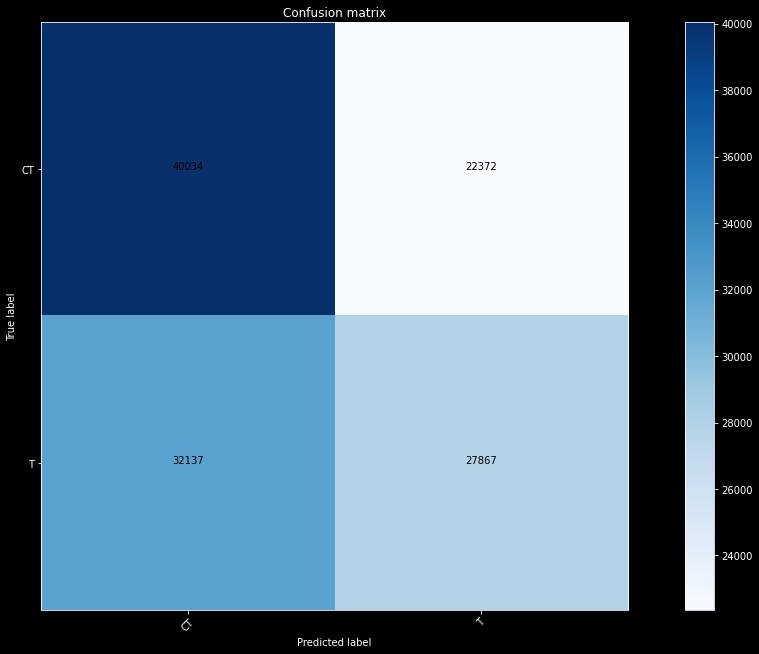

In [ ]:
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(confusion_matrix(y, kmeans.labels_), ['CT', 'T'])

Точность не велика, большое количество признаков и плохая отделимость.

###DBSCAN

In [ ]:
%%time
dbscan = DBSCAN().fit(X)
print(f'Labels {np.unique(dbscan.labels_)}')
print(f'Accuracy is {np.sum(y == dbscan.labels_)/y.shape[0]}')

Labels [-1  0  1  2  3  4  5]
Accuracy is 0.0017
Wall time: 21.5 s


In [ ]:
eps_counts = [x for x in range(3, 15, 2) ] + [20, 50]
eps_counts[:]

[3, 5, 7, 9, 11, 13, 20, 50]

In [ ]:
labels = []
accuracy = []
for eps in eps_counts[:]:
    dbscan = DBSCAN(eps = eps, n_jobs = 12).fit(X)
    labels.append(np.unique(dbscan.labels_))
    accuracy.append(np.sum(np.sum(y == dbscan.labels_) / y.count()))
    print("Accuracy {}".format(accuracy[-1]))

Accuracy 0.03040625
Accuracy 0.41559375
Accuracy 0.51
Accuracy 0.51171875
Accuracy 0.51175
Accuracy 0.51175
Accuracy 0.51175
Accuracy 0.51128125


In [ ]:
labels

[array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
        33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
        50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64],
       dtype=int64),
 array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
        33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
        50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65],
       dtype=int64),
 array([-1,  0,  1], dtype=int64),
 array([-1,  0,  1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0], dtype=int64)]

Увеличение расстояния немного помогает, но лучшая точность в итоге достигается просто отнесением всех данных к одному, более популярному, классу...

#### Additional calcs

Accuracy 0.027563107589249243
Accuracy 0.4776407156278082
Accuracy 0.5101789069520464

In [ ]:
labels_counts = [len(x) for x in labels]
labels_counts

[66, 67, 3, 3, 2, 2, 2, 1]

In [ ]:
accuracy

[0.03040625,
 0.41559375,
 0.51,
 0.51171875,
 0.51175,
 0.51175,
 0.51175,
 0.51128125]

In [ ]:
labels = []
accuracy = []
eps_counts = [5 + x*0.25 for x in range(1, 8)]
print(eps_counts)
for eps in eps_counts[:]:
    dbscan = DBSCAN(eps = eps, n_jobs = 12).fit(X)
    labels.append(np.unique(dbscan.labels_))
    accuracy.append(np.sum(np.sum(y == dbscan.labels_) / y.count()))
    print("Accuracy {}".format(accuracy[-1]))

[5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75]
Accuracy 0.4475
Accuracy 0.46828125
Accuracy 0.482375
Accuracy 0.49346875
Accuracy 0.50096875
Accuracy 0.50575
Accuracy 0.5081875


In [ ]:
labels

[array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
        33, 34, 35, 36, 37, 38, 39, 40], dtype=int64),
 array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27], dtype=int64),
 array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21], dtype=int64),
 array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64),
 array([-1,  0,  1,  2,  3,  4,  5], dtype=int64),
 array([-1,  0,  1,  2], dtype=int64),
 array([-1,  0,  1], dtype=int64)]

In [ ]:
accuracy

[0.4475, 0.46828125, 0.482375, 0.49346875, 0.50096875, 0.50575, 0.5081875]

In [ ]:
accuracy = [0.03040625,
 0.41559375,
 0.4475,
 0.46828125,
 0.482375,
 0.49346875,
 0.50096875,
 0.50575,
 0.5081875,
 0.51,
 0.51171875,
 0.51175,
 0.51175,
 0.51175,
 0.51128125]

In [ ]:
eps_counts = [3, 5, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7, 9, 11, 13, 20, 50]

#### Results

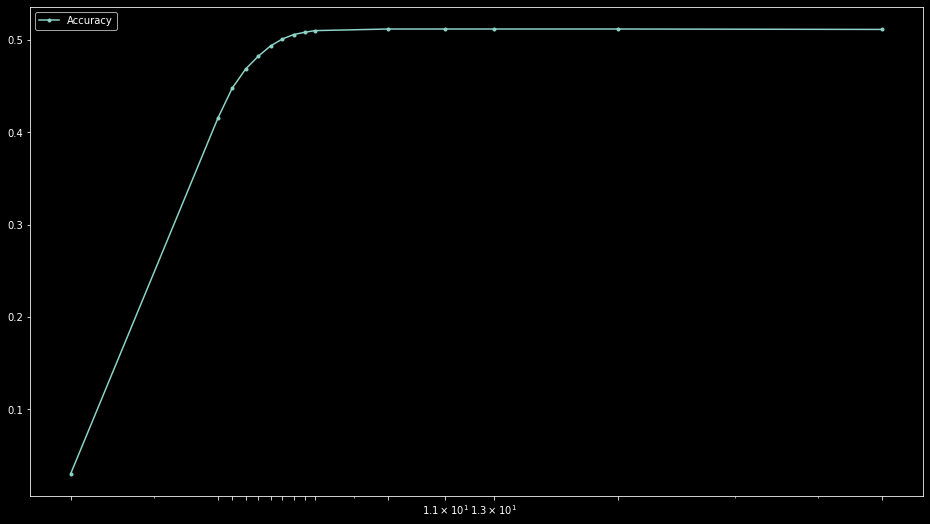

In [ ]:
plt.plot(eps_counts, accuracy, marker='.', ls = '-',  label='Accuracy')
plt.xscale("log")
plt.xticks(eps_counts)
plt.legend()

####PCA

In [ ]:
%%time
pca3 = PCA(n_components = 7)
pca3.fit(X, y)
X_pca = pca3.transform(X)

Wall time: 173 ms


In [ ]:
%%time
labels = []
accuracy = []
for eps in eps_counts[:]:
    dbscan = DBSCAN(eps = eps, n_jobs = 12).fit(X)
    labels.append(np.unique(dbscan.labels_))
    accuracy.append(np.sum(np.sum(y == dbscan.labels_) / y.count()))
    print("Accuracy {}".format(accuracy[-1]))
    print("Labels {}".format(len(labels[-1])))

Accuracy 0.02496875
Labels 72
Accuracy 0.4174375
Labels 68
Accuracy 0.51340625
Labels 4
Accuracy 0.51575
Labels 3
Accuracy 0.51575
Labels 2
Accuracy 0.51575
Labels 2
Accuracy 0.51575
Labels 2
Accuracy 0.5153125
Labels 1
Wall time: 8min 4s


Как видно, PCA не помог

### Birch


In [ ]:
%%time
from sklearn.cluster import Birch
brc = Birch(n_clusters=2)
brc.fit(X)
labels = brc.predict(X)

Wall time: 1min 50s


In [ ]:
print('Accuracy: {}'.format(np.sum(y == labels) / y.count()))

Accuracy: 0.517


### Concl

Из-за большого количества плохоотделимых признаков методы кластеризации на данном наборе данных показывают плохие результаты.